In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
##### results from paper (Cuomo*, Seaton*, McCarthy* et al Nat Commun 2020)

In [3]:
# union of ips + mesendo + defendo eQTL (pseudobulk, expanded K)

In [4]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [5]:
leads.ips$stage = "ips"
leads.mes$stage = "mesendo"
leads.defendo$stage = "defendo"

In [6]:
### combine results

In [7]:
leads = rbind(leads.ips, leads.mes, leads.defendo)

In [8]:
leads$ensembl_gene_id = gsub("_.*","",leads$feature)

In [9]:
head(leads,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,stage,ensembl_gene_id
-1.0048674,0.08005311,3.631688e-34,3.851118e-36,5_149826526_C_T,ENSG00000164587_RPS14,2.880363e-30,5,149826526,C,...,0.56508683,0.6296458,0.004683908,0.5159591,0.7734028,0.6450821,0.6001209,0.9876646,ips,ENSG00000164587
-0.9881017,0.08648823,2.432216e-26,3.147553e-30,11_57283988_C_T,ENSG00000134809_TIMM10,8.853960e-23,11,57283988,C,...,0.08194005,0.6897261,0.683497330,0.5137511,0.7877572,0.6064095,0.5419861,0.5654441,ips,ENSG00000134809


In [10]:
#### pick top SNP per gene (min p-value across stages)

In [11]:
nrow(leads)
leads = leads[order(leads$p_value),]
leads = leads[-which(duplicated(leads$feature)),]
nrow(leads)

[1] 32665

[1] 10788

In [12]:
nrow(leads[leads$global_corr_p_value<0.05,])

[1] 2080

In [13]:
# load all results sc stages (iPS, mesendo, defendo)
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [14]:
res.ips$stage = "ips"
res.mes$stage = "mesendo"
res.defendo$stage = "defendo"

In [15]:
res = rbind(res.ips, res.mes, res.defendo)

In [16]:
res$ensembl_gene_id = gsub("_.*","",res$feature)

In [17]:
head(res,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,permutation_0,permutation_1,permutation_2,permutation_3,...,permutation_6,permutation_7,permutation_8,permutation_9,ensembl_gene_id,chrom,pos,ref_allele,alt_allele,stage
0.1034053,0.1156505,1,0.3712581,1_100712195_G_C,ENSG00000079335_CDC14A,0.4119083,0.02609394,0.6008147,0.1373799,...,0.1993281,0.2655322,0.9174491,0.8586736,ENSG00000079335,1,100712195,G,C,ips
0.1034053,0.1156505,1,0.3712581,1_100713300_G_T,ENSG00000079335_CDC14A,0.4119083,0.02609394,0.6008147,0.1373799,...,0.1993281,0.2655322,0.9174491,0.8586736,ENSG00000079335,1,100713300,G,T,ips


In [18]:
#### pick top eQTL per stage (min p-value across stages)

In [19]:
res$eqtl = paste0(res$feature,"-",res$snp_id)
nrow(res)

[1] 16059303

In [20]:
res = res[order(res$p_value),]
res = res[-which(duplicated(res$eqtl)),]
nrow(res)

[1] 5567940

In [21]:
##### limix QTL reproducing CellRegMap association test

In [22]:
# limix_qtl with two random effects (single cells, expanded K + CCt)

In [23]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/limix_qtl_pipeline_Gtest/Gtest_10MOFA/"

In [24]:
myfile = paste0(mydir,"results_mj/TestOut/top_qtl_results_all.txt")
df = read.csv(myfile, sep="\t")
nrow(df)
head(df,2)

[1] 11083

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
7_99442565_A_G,0.03640359,-0.19143557,0.09148769,0.9328839,7,99245817,99277621,27598,99,0.612032,52.19879,0.9,7,99442565,G,1,0.05050505,1,ENSG00000106258
7_99143503_A_T,0.02247299,-0.08541319,0.03742278,0.6305276,7,99214569,99230030,27598,99,1.121871,50.00241,0.8,7,99143503,T,1,0.07575758,1,ENSG00000197037


In [25]:
length(unique(df$feature_id))

[1] 10802

In [79]:
myfile0 = paste0(mydir,"results_mj/TestOut/qtl_results_all.txt.gz")
# df0 = read.csv(gzfile(myfile0), sep="\t")
nrow(df0)
head(df0,2)

[1] 19131741

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,ensembl_gene_id
ENSG00000221909,7_99141373_G_A,0.0288737,0.05597193,0.02561291,0.4631133,7,99143931,99156159,27598,...,0.964815,20.15266,0.8,7,99141373,A,1,0.07575758,0.4360553,ENSG00000221909
ENSG00000221909,7_99024636_C_T,0.0366472,0.05150536,0.02464660,0.5453543,7,99143931,99156159,27598,...,0.964815,20.15266,0.8,7,99024636,T,1,0.10606061,0.5939258,ENSG00000221909


In [80]:
colnames(df0)

[1] "feature_id"                "snp_id"                   
 [3] "p_value"                   "beta"                     
 [5] "beta_se"                   "empirical_feature_p_value"
 [7] "feature_chromosome"        "feature_start"            
 [9] "feature_end"               "n_samples"                
[11] "n_e_samples"               "alpha_param"              
[13] "beta_param"                "rho"                      
[15] "snp_chromosome"            "snp_position"             
[17] "assessed_allele"           "call_rate"                
[19] "maf"                       "hwe_p"                    
[21] "ensembl_gene_id"

In [27]:
length(unique(df0$feature_id))

[1] 10802

In [28]:
####################
#### merge

In [29]:
genes_new = as.character(unique(df0$feature_id))
genes_old = as.character(unique(res$ensembl_gene_id))

In [30]:
length(genes_old)
head(genes_old,2)

[1] 10788

[1] "ENSG00000163682" "ENSG00000226278"

In [31]:
length(genes_new)
head(genes_new,2)

[1] 10802

[1] "ENSG00000221909" "ENSG00000197037"

In [32]:
common_genes = genes_new[genes_new %in% genes_old]
length(common_genes)

[1] 10782

In [33]:
########## new leads & old results

In [34]:
df$ensembl_gene_id = df$feature_id

In [35]:
df1 = inner_join(df,res, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [36]:
nrow(df1)

[1] 5870

In [37]:
cor.test(-log10(df1$p_value.new),-log10(df1$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df1$p_value.new) and -log10(df1$p_value.old)
t = 98.776, df = 5868, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7804111 0.7996344
sample estimates:
     cor 
0.790217 


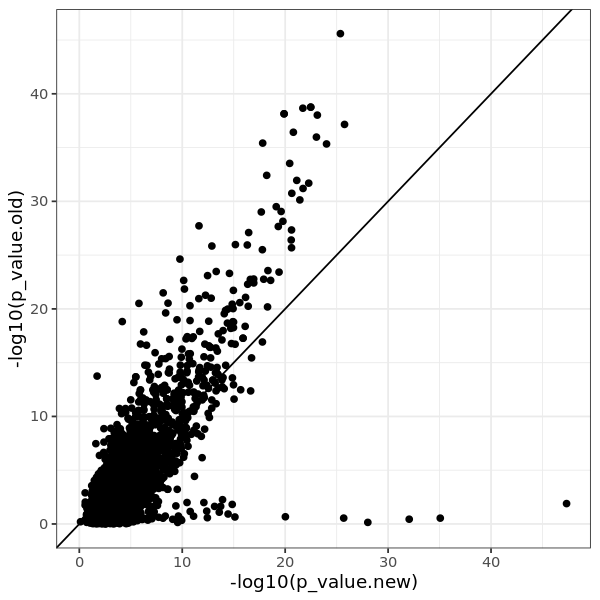

In [38]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df1, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [39]:
########## old leads & new results

In [40]:
df0$ensembl_gene_id = df0$feature_id
df2 = inner_join(df0,leads, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [41]:
nrow(df2)

[1] 16810

In [42]:
cor.test(-log10(df2$p_value.new),-log10(df2$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df2$p_value.new) and -log10(df2$p_value.old)
t = 205.54, df = 16808, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8414386 0.8500455
sample estimates:
      cor 
0.8457971 


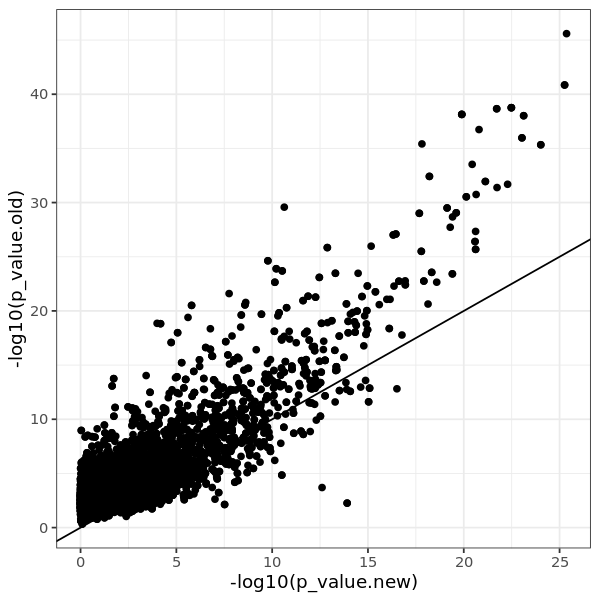

In [43]:
ggplot(df2, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [44]:
########## old & new results

In [45]:
df3 = inner_join(df0,res, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [46]:
nrow(df3)

[1] 8732372

In [47]:
cor.test(-log10(df3$p_value.new),-log10(df3$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df3$p_value.new) and -log10(df3$p_value.old)
t = 3599.3, df = 8732370, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7726174 0.7731515
sample estimates:
      cor 
0.7728846 


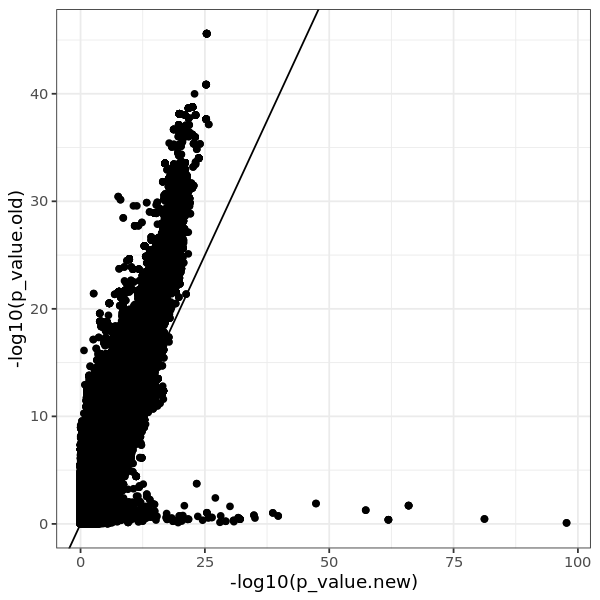

In [48]:
ggplot(df3, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [66]:
# df3[-log10(df3$p_value.new)>15 & -log10(df3$p_value.old)<5,
#     c("feature_id","snp_id","p_value.new","p_value.old","beta.new","beta.old")]
int_genes = unique(as.character(df3[-log10(df3$p_value.new)>15 & -log10(df3$p_value.old)<5,"feature_id"]))
int_genes

[1] "ENSG00000271043" "ENSG00000109475" "ENSG00000085733" "ENSG00000181350"
 [5] "ENSG00000166441" "ENSG00000142534" "ENSG00000118181" "ENSG00000089009"
 [9] "ENSG00000125691" "ENSG00000108953" "ENSG00000163041" "ENSG00000105426"
[13] "ENSG00000172809" "ENSG00000131469" "ENSG00000008988" "ENSG00000184697"
[17] "ENSG00000117519"

In [63]:
###### look these up in betaGxE results?

In [1]:
df_beta = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
head(df_beta)

,ENSG00000005059_CCDC109B_.4_110648632_T_A,ENSG00000006016_CRLF1_.19_18735221_G_T,ENSG00000006459_KDM7A_.7_139913409_G_A,ENSG00000013297_CLDN11_.3_170402765_T_C,ENSG00000021300_PLEKHB1_.11_73339784_G_A,ENSG00000029639_TFB1M_.6_155635808_C_G,ENSG00000033178_UBA6_.4_68480525_C_T,ENSG00000035115_SH3YL1_.2_256116_G_T,ENSG00000059377_TBXAS1_.7_139547370_G_A,ENSG00000063761_ADCK1_.14_78311319_G_A,...,ENSG00000248098_BCKDHA_.19_41937095_G_A,ENSG00000248124_RRN3P1_.16_21818292_A_C,ENSG00000250317_SMIM20_.4_25918516_A_G,ENSG00000253203_GUSBP3_.5_68922087_T_G,ENSG00000254184_TYW1B_.7_72200923_G_A,ENSG00000256018_HIST1H3G_.6_26198845_G_C,ENSG00000256073_C21orf119_.21_33728588_C_A,ENSG00000259024_TVP23C.CDRT4_.17_15434991_C_T,ENSG00000259803_SLC22A31_.16_89234110_G_C,ENSG00000267323_SLC25A1P5_.19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.029627685,0.18296979,-0.03793941,-0.029324411,0.031398501,-0.03962300,0.08013833,0.027498382,...,-0.08185803,-0.10862369,-0.10317566,-0.048543205,0.095111678,-0.002571070,-0.055608331,0.1931245,-0.06168149,0.054686251
21843_1#100,-0.04797379,-0.002567715,-0.050303678,0.14204539,-0.06425603,-0.017894114,-0.064683766,-0.08820444,0.23273882,0.040375905,...,-0.16133495,-0.45571807,-0.09858982,-0.095641305,0.007662211,-0.001386594,-0.094118770,0.2614240,-0.16271379,-0.037051849
21843_1#101,-0.01707154,-0.038323702,0.001072175,0.05068042,-0.04211749,-0.028163711,-0.079442257,-0.05854781,0.14245545,0.019225081,...,-0.08464140,-0.22917228,-0.08647358,-0.027566411,0.030433187,-0.038522875,-0.007152012,0.1489600,-0.08467373,-0.001068028
21843_1#102,-0.06849843,0.029141143,0.006591071,0.27772236,0.05210891,-0.039448204,0.002744249,-0.08783030,0.06083871,0.034590880,...,-0.05465162,-0.09382258,-0.12475134,-0.009728905,0.052761776,-0.008942713,-0.024298554,0.2108875,-0.06577307,0.020432219
21843_1#103,-0.02065975,0.017882432,-0.019780588,0.12713250,-0.04432031,-0.010911430,-0.024407791,-0.03931027,0.06883815,0.009218694,...,-0.04543236,-0.13128624,-0.06491895,-0.033262391,0.063575007,0.044047100,-0.037472203,0.1392061,-0.06160699,0.047756355
21843_1#105,0.03203034,0.029327187,-0.015424171,0.13315777,-0.03401761,-0.004702419,-0.075634975,-0.02003224,0.09548422,0.003292832,...,-0.08535482,-0.14593277,-0.07771164,-0.053617513,0.141638220,0.019637691,0.041395040,0.1576655,-0.03509197,0.113248113


In [2]:
colnames(df_beta)[grep("CPZ",colnames(df_beta))]

[1] "ENSG00000109625_CPZ_.4_8567600_T_A"

In [68]:
for (ig in int_genes){
    print(colnames(df_beta)[grep(ig,colnames(df_beta))])
}

character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)


In [61]:
grep("ENSG00000271043",colnames(df_beta))
grep("PTPRS",colnames(df_beta))

integer(0)

integer(0)

In [ ]:
# compare power

In [53]:
leads_common = leads[leads$ensembl_gene_id %in% common_genes,]
df_common = df[df$feature_id %in% common_genes,]
nrow(leads_common)
nrow(df_common)

[1] 10782

[1] 11061

In [57]:
library(qvalue)
df_common$global_corr_p_value = qvalue(df_common$empirical_feature_p_value)$qvalues

In [78]:
c(length(unique(leads_common[leads_common$global_corr_p_value < 0.05,"feature"])),
length(unique(leads_common[leads_common$global_corr_p_value < 0.05,"feature"]))/length(unique(leads_common$feature)))
c(length(unique(df_common[df_common$global_corr_p_value < 0.05,"feature_id"])),
length(unique(df_common[df_common$global_corr_p_value < 0.05,"feature_id"]))/length(unique(df_common$feature_id)))

[1] 2079.0000000    0.1928214

[1] 1802.0000000    0.1671304